In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, make_blobs, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, log_loss
from sklearn.model_selection import train_test_split

In [2]:
from tqdm import tqdm

# RÉSEAU DE NEURONES (2 COUCHES)

In [26]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)

X = X.T
y = y.reshape((1, y.shape[0]))

In [27]:
X.shape

(2, 1000)

In [28]:
def initialisation(X, y, C=(c,n)):
    
    parametres = {}
    
    # initialisation 1ere couche
    parametres['W1'] = np.random.randn(C[1], X.shape[0])
    parametres['b1'] = np.random.randn(C[1], 1)
    
    # creation des couches intermédiaires
    for couche in range(2, C[0]):
        parametres[f'W{couche}'] = np.random.randn(C[1], C[1])
        parametres[f'b{couche}'] = np.random.randn(C[1], 1)
    
    # creation couche de sortie
    parametres[f'W{C[0]}'] = np.random.randn(y.shape[0], C[1])
    parametres[f'b{C[0]}'] = np.random.randn(y.shape[0], 1)
    
    
    return parametres, C

In [29]:
parametres = initialisation(X, y, C=(3,2))

for e in parametres[0].values():
    print(e.shape)

(2, 2)
(2, 1)
(2, 2)
(2, 1)
(1, 2)
(1, 1)


In [36]:
parametres

({'W1': array([[ 0.07889052,  0.89355267],
         [-0.09005881,  0.68167262]]),
  'b1': array([[-0.52032572],
         [-3.08305443]]),
  'W2': array([[ 0.78826331,  0.10228832],
         [-0.81425056, -0.47374569]]),
  'b2': array([[ 1.53367052],
         [-0.3541375 ]]),
  'W3': array([[ 1.78626791, -1.20983173]]),
  'b3': array([[-0.43725475]])},
 (3, 2))

In [39]:
def forward_propagation(X, parametres):
    
    # declaration dictionnaire activations
    activations = {}
    
    # activation 1 egale à X
    A = X
    
    
    for couche in range(1, 1+parametres[1][0]):
        Z = parametres[0][f"W{couche}"].dot(A) + parametres[0][f"b{couche}"]
        A = 1 / (1 + np.exp(-Z))
        
        activations[f'A{couche}'] = A
    
    return activations

In [40]:
activations = forward_propagation(X, parametres)
for e in activations.values():
    print(e.shape)

(2, 1000)
(2, 1000)
(1, 1000)


In [41]:
activations

{'A1': array([[0.38534234, 0.34150383, 0.22114947, ..., 0.39290805, 0.41323821,
         0.40246276],
        [0.04336597, 0.03951815, 0.02851623, ..., 0.0465434 , 0.04762333,
         0.049801  ]]),
 'A2': array([[0.86316825, 0.85898773, 0.84695446, ..., 0.86390932, 0.86579531,
         0.86483134],
        [0.3343786 , 0.34278028, 0.36639401, ..., 0.33267463, 0.32889694,
         0.33060809]]),
 'A3': array([[0.66819956, 0.66427882, 0.65302388, 0.67094861, 0.67129082,
         0.66682137, 0.67806462, 0.66980593, 0.65252708, 0.66779406,
         0.66858602, 0.67283287, 0.66351455, 0.66528941, 0.67143059,
         0.6804003 , 0.66406228, 0.67915322, 0.67479622, 0.68401545,
         0.67750049, 0.66498928, 0.65147545, 0.65448197, 0.66083228,
         0.66627783, 0.6766602 , 0.68662876, 0.66758857, 0.6701052 ,
         0.6630682 , 0.67147394, 0.67254467, 0.66147286, 0.65204972,
         0.66719884, 0.66597946, 0.64974009, 0.66441415, 0.66159138,
         0.67319045, 0.66845442, 0.6737173

In [42]:
#def log_loss(A2, y):
    #return 1 / len(y) * np.sum(-y * np.log(A2) - (1 - y) * np.log(1 - A2))

In [43]:
def back_propagation(parametres, activations, X, y):
    
    m = y.shape[1]
    
    gradients = {}
    
    # dZ = A - y ou A est la derniere activation dans ce cas 
    A = activations[f'A{parametres[1][0]}']
    dZ = A - y
    
    for couche in range(parametres[1][0], 0, -1):
        # activation couche inférieur
        if couche == 1 : 
            A=X
        else : 
            A = activations[f'A{couche-1}']
        # paramètre couche en cours
        W = parametres[0][f"W{couche}"]
        
        # gradient couche en cours
        dW = (1/m) * dZ.dot(A.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        
        gradients[f'dW{couche}'] = dW
        gradients[f'db{couche}'] = db
        
        # dZ couche inférieur
        dZ = W.T.dot(dZ) * A * (1-A)

    
    return gradients

In [44]:
gradients = back_propagation(parametres, activations, X, y)

In [45]:
gradients = back_propagation(parametres, activations, X, y)
for e, i in zip(gradients.values(), parametres[0].values()):
    print(e.shape)
    print(i.shape)
    print('_'*100)

(1, 2)
(2, 2)
____________________________________________________________________________________________________
(1, 1)
(2, 1)
____________________________________________________________________________________________________
(2, 2)
(2, 2)
____________________________________________________________________________________________________
(2, 1)
(2, 1)
____________________________________________________________________________________________________
(2, 2)
(1, 2)
____________________________________________________________________________________________________
(2, 1)
(1, 1)
____________________________________________________________________________________________________


In [46]:
def update(gradients, parametres, learning_rate):
    
    for couche in range(1, 1+parametres[1][0]):
        parametres[0][f"W{couche}"] = parametres[0][f"W{couche}"] - learning_rate * gradients[f'dW{couche}']
        parametres[0][f"b{couche}"] = parametres[0][f"b{couche}"] - learning_rate * gradients[f'db{couche}']
    
    return parametres

In [47]:
def predict(X, parametres):
    
    activations = forward_propagation(X, parametres)
    A = activations[f'A{parametres[1][0]}']
    
    return A >= 0.5

In [48]:
def neural_network(X, y, C=(c,n), learning_rate = 0.1, n_iter = 1000):

    
    parametres = initialisation(X, y, C=(c,n))
    

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(parametres, activations, X, y)
        parametres = update(gradients, parametres, learning_rate)
    
        A_fin = activations[f"A{c}"]
        
        if i %10 == 0:
            # Train
            train_loss.append(log_loss(y, A_fin))
            y_pred = predict(X, parametres)
            train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))



    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    

    return parametres

In [49]:
def evaluation(X_test, y_test, parametres):
    # y_pred du jeu de test avec les paramètres finaux
    y_pred = predict(X_test, parametres)
    
    # accuracy score et matrice de confusion
    accuracy_test = accuracy_score(y_test.T, y_pred.T)
    
    # crosstab
    crosstab = pd.crosstab(y_test, y_pred.astype('int'))
    crosstab.index = ['test 0', 'test 1']
    crosstab.columns = ['pred 0', 'pred 1']
    crosstab = crosstab.T
    
    print(f"L'accuracy sur le jeu de test est de {accuracy_test}")
    return crosstab

## Test avec un cercle

In [19]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:46<00:00, 2136.28it/s]


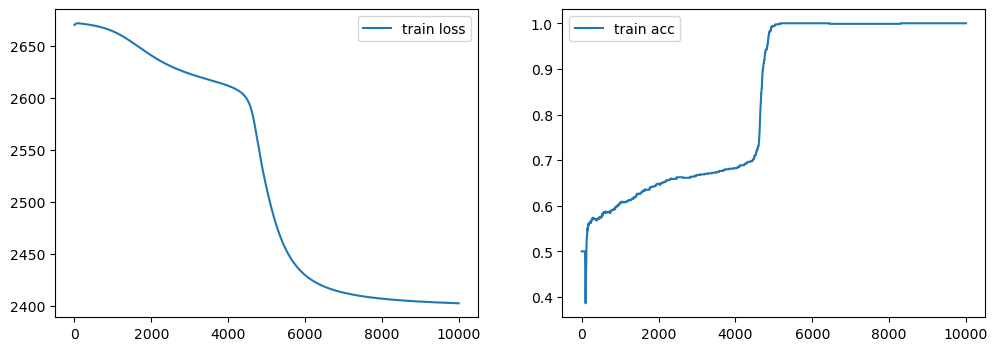

({'W1': array([[-3.86921503,  5.45536639],
         [ 6.28092959,  1.08467218],
         [ 1.89667172,  4.75027664]]),
  'b1': array([[ 3.08967226],
         [ 3.07254627],
         [-2.5765048 ]]),
  'W2': array([[ 0.76786357,  1.08078283, -1.81929568],
         [-5.32814188, -5.22749753,  6.08194242],
         [-2.17293725,  0.3632459 , -0.97539164]]),
  'b2': array([[ 0.13910062],
         [ 6.71281621],
         [-0.83016352]]),
  'W3': array([[  3.45524933, -12.09307508,   0.17970346]]),
  'b3': array([[2.88203323]])},
 (3, 3))

In [22]:
neural_network(X=X_train, y=y_train, C=(6,10), learning_rate = 0.01, n_iter = 100000)

In [23]:
activations[f'A{parametres[1][0]}']

array([[0.52514627, 0.53660171, 0.5644781 , 0.52893243, 0.53588026,
        0.52868622, 0.50406015, 0.55444877, 0.56757055, 0.54087777,
        0.51158326, 0.52345876, 0.53941261, 0.55694815, 0.52715147,
        0.50681845, 0.53543051, 0.53669589, 0.50304468, 0.50916705,
        0.50714987, 0.51193644, 0.56768392, 0.56174494, 0.54009398,
        0.53712036, 0.50293186, 0.50768215, 0.54149712, 0.51029738,
        0.53907208, 0.53470773, 0.53187415, 0.54561362, 0.54005199,
        0.54243008, 0.53103561, 0.55543336, 0.53379019, 0.55981383,
        0.54976323, 0.52864213, 0.52887324, 0.53257433, 0.5592098 ,
        0.53734067, 0.54170984, 0.52544321, 0.56253856, 0.52646522,
        0.55932075, 0.56337897, 0.5628853 , 0.53248423, 0.5420269 ,
        0.52426834, 0.55840175, 0.56128674, 0.52333005, 0.56275661,
        0.52244849, 0.52331433, 0.5216878 , 0.54198029, 0.53864809,
        0.54538212, 0.56138831, 0.51993224, 0.55938002, 0.52869835,
        0.54175571, 0.56193555, 0.53665593, 0.55

In [295]:
predict(X_test, parametres)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [298]:
evaluation(X_test, y_test, parametres)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

## Test sur les photos de chiens et chats

In [159]:
import h5py
import utilities

In [160]:
X_train, y_train, X_test, y_test = utilities.load_data()

In [161]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [162]:
# standardisation entre 0 et 1
X_train_scaler = X_train/255
X_test_scaler = X_test/255

# vectorisation des images
X_train_scaler = X_train_scaler.reshape(X_train_scaler.shape[0], X_train_scaler.shape[1]*X_train_scaler.shape[2])
X_test_scaler = X_test_scaler.reshape(X_test_scaler.shape[0], X_test_scaler.shape[1]*X_test_scaler.shape[2])

# transposition des matrices
X_train_scaler = X_train_scaler.T
X_test_scaler = X_test_scaler.T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

In [163]:
print(X_train_scaler.shape)
print(y_train.shape)
print(X_test_scaler.shape)
print(y_test.shape)

(4096, 1000)
(1, 1000)
(4096, 200)
(1, 200)


100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:04<00:00, 41.27it/s]


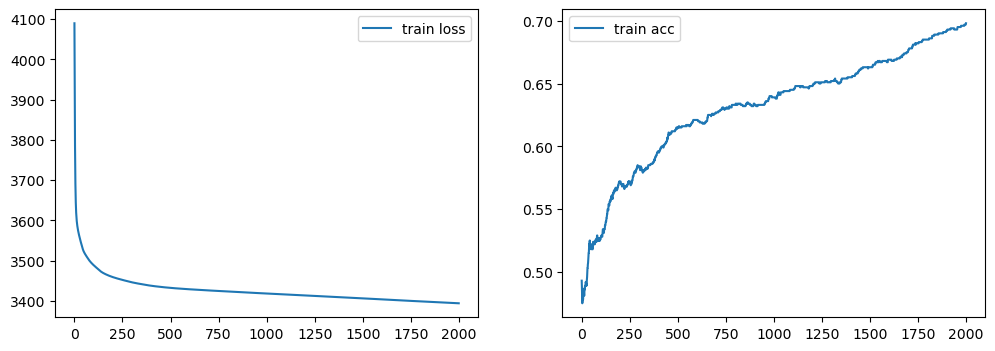

In [166]:
parametres = neural_network(
    X_train=X_train_scaler, y_train=y_train, n1=32,
    learning_rate = 0.01, n_iter = 20000)

In [167]:
evaluation(X_test_scaler, y_test, parametres)

L'accuracy sur le jeu de test est de 0.515


,test 0,test 1
pred 0,47,44
pred 1,53,56
